In [1]:
# dataset https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [120]:
df = pd.read_csv("airbnb.csv", parse_dates=[1, 3], infer_datetime_format=True)

In [121]:
import datetime as dt
df['signup_till_booking_days'] = (df.date_first_booking - df.date_account_created).dt.days
gender_mapping = {'MALE':0, 'FEMALE':10, 'OTHER':20, '-unknown-':30}
df['gender'] = df.gender.map(gender_mapping)

In [122]:
my_df = df[['signup_till_booking_days', 'gender', 'age']]

In [123]:
my_df = my_df[my_df.age<100]

In [124]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
model = KMeans(5)
scaler = MinMaxScaler()

In [125]:
df_scaled = scaler.fit_transform(my_df.dropna())
model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
df_clusters = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_))
df_clusters.columns = my_df.columns
df_clusters

,signup_till_booking_days,gender,age
0,19.308017,5.012657e-13,36.270439
1,43.920910,2.993797e+01,36.750237
2,23.157803,9.728884e+00,54.788669
3,271.243675,5.679152e+00,34.790389
4,20.351148,1.002595e+01,30.736727


In [127]:
# get counts of clusters to undertand their size and relevance
df_cluster_assignment = pd.DataFrame(model.predict(df_scaled))
df_cluster_assignment.columns = ['Cluster']
df_cluster_assignment['Cluster'] = df_cluster_assignment['Cluster'].apply(lambda x: f"Cluster {x}")
df_cluster_assignment['no_of_users_in_cluster'] = 1
df_cluster_volumes = df_cluster_assignment.groupby('Cluster').sum()
df_cluster_volumes = df_cluster_volumes.reset_index()
total_cluster_volume = df_cluster_volumes.no_of_users_in_cluster.sum()
df_cluster_volumes['percentage'] = (df_cluster_volumes.no_of_users_in_cluster / total_cluster_volume) * 100.0
df_cluster_volumes

,Cluster,no_of_users_in_cluster,percentage
0,Cluster 0,22726,33.817446
1,Cluster 1,11608,17.273295
2,Cluster 2,5753,8.560757
3,Cluster 3,7072,10.523496
4,Cluster 4,20043,29.825005


In [128]:
import plotly.graph_objects as go
# radar plot of clusters
fig = go.Figure()

for index, row in df_clusters.iterrows():
    df_temp = pd.DataFrame(row).reset_index()
    df_temp.columns = ['variable', 'r']
    fig.add_trace(go.Scatterpolar(r=df_temp.r, theta=df_temp.variable, fill='toself', name=f"Cluster {index}"))
        
fig.update_layout(polar=dict(radialaxis=dict(visible=True)), showlegend=True)
fig.show()

In [141]:
df[df['age']<100].sample(10000).groupby(['age']).agg({'signup_till_booking_days':['mean', 'sum']})

signup_till_booking_days        
                         mean     sum
age                                  
2.0                       NaN     0.0
5.0                       NaN     0.0
15.0                      NaN     0.0
17.0                    18.50    37.0
18.0                    74.88  1872.0
...                       ...     ...
92.0                      NaN     0.0
95.0                     0.00     0.0
96.0                     1.00     1.0
98.0                      NaN     0.0
99.0                      NaN     0.0

[81 rows x 2 columns]

In [16]:
import numpy as np
df_tr = df.copy()

#df_tr['first_device_type'] = df.first_device_type.apply(lambda x: np.NaN if x=='Other/Unknown' else x)

# apply mapping to one column (gender)
gender_mapping = {'MALE':0, 'FEMALE':1, 'OTHER':2} #, '-unknown-':np.NaN}
df_tr['gender'] = df_tr.gender.apply(lambda x: gender_mapping[x] if x in gender_mapping.keys() else x)

# apply mapping to one column (first_affiliate_tracked)
affiliate_mapping = {'untracked':np.NaN}
df_tr['first_affiliate_tracked'] = df_tr.first_affiliate_tracked.apply(lambda x: affiliate_mapping[x] if x in affiliate_mapping.keys() else x)

# apply mapping to all columns
unknown_mapping = {'-unknown-':np.NaN, 'Other/Unknown':np.NaN, 'other':np.NaN}
df_tr = df_tr.apply(lambda x: [unknown_mapping[a] if a in unknown_mapping.keys() else a for a in x])

df_tr.head(50)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaT,0.0,38.0,facebook,0,en,seo,google,NaN,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,1.0,56.0,basic,3,en,direct,direct,NaN,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,1.0,42.0,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Firefox,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,NaN,basic,0,en,NaN,NaN,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,1.0,46.0,basic,0,en,NaN,craigslist,NaN,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,1.0,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,1.0,50.0,basic,0,en,NaN,craigslist,NaN,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,NaN,46.0,basic,0,en,NaN,craigslist,omg,Web,Mac Desktop,Firefox,US


In [17]:
df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active              int64
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [18]:
df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [19]:
#df_tr.first_device_type.isna().sum()
df_tr.date_first_booking.isna().sum() / len(df)

0.5834734904029496

In [20]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install missingno

import missingno as msno
%matplotlib inline

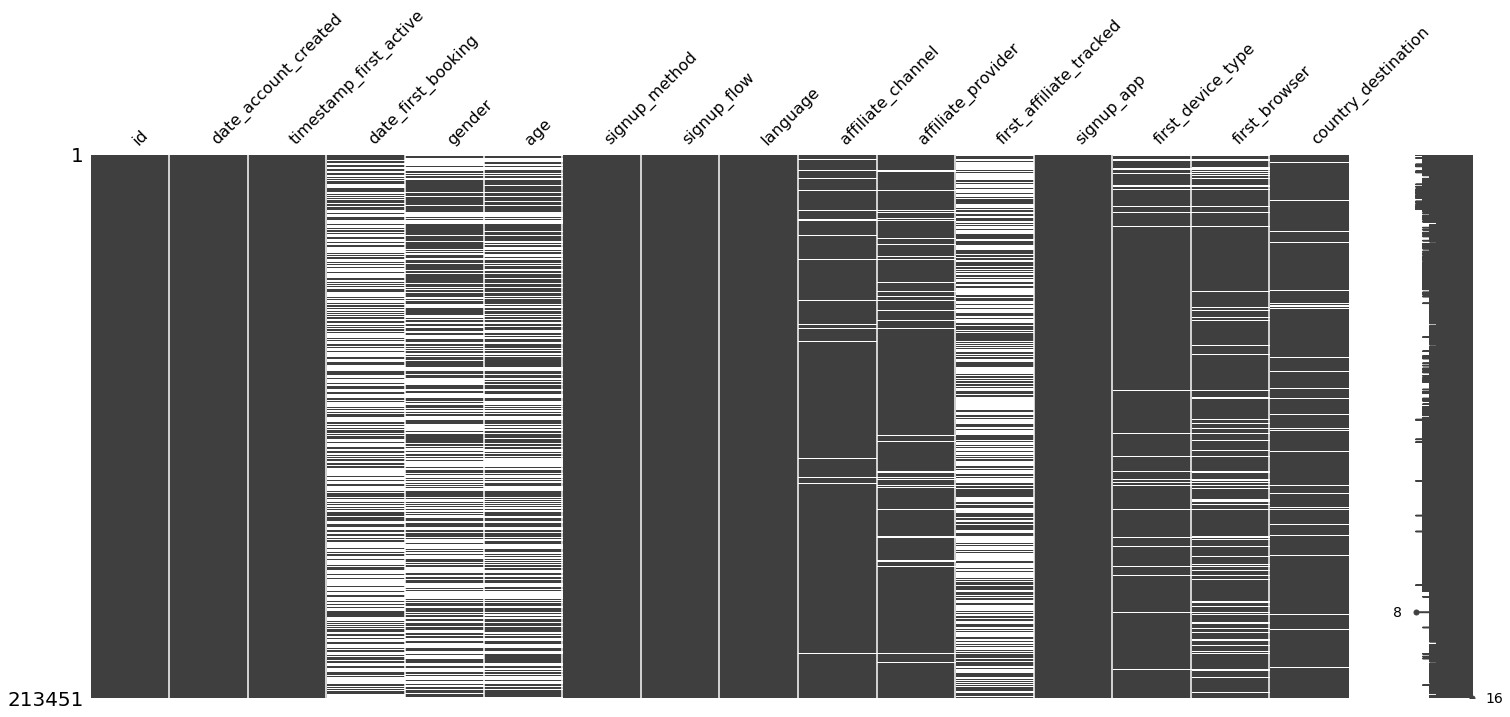

In [21]:
msno.matrix(df_tr)

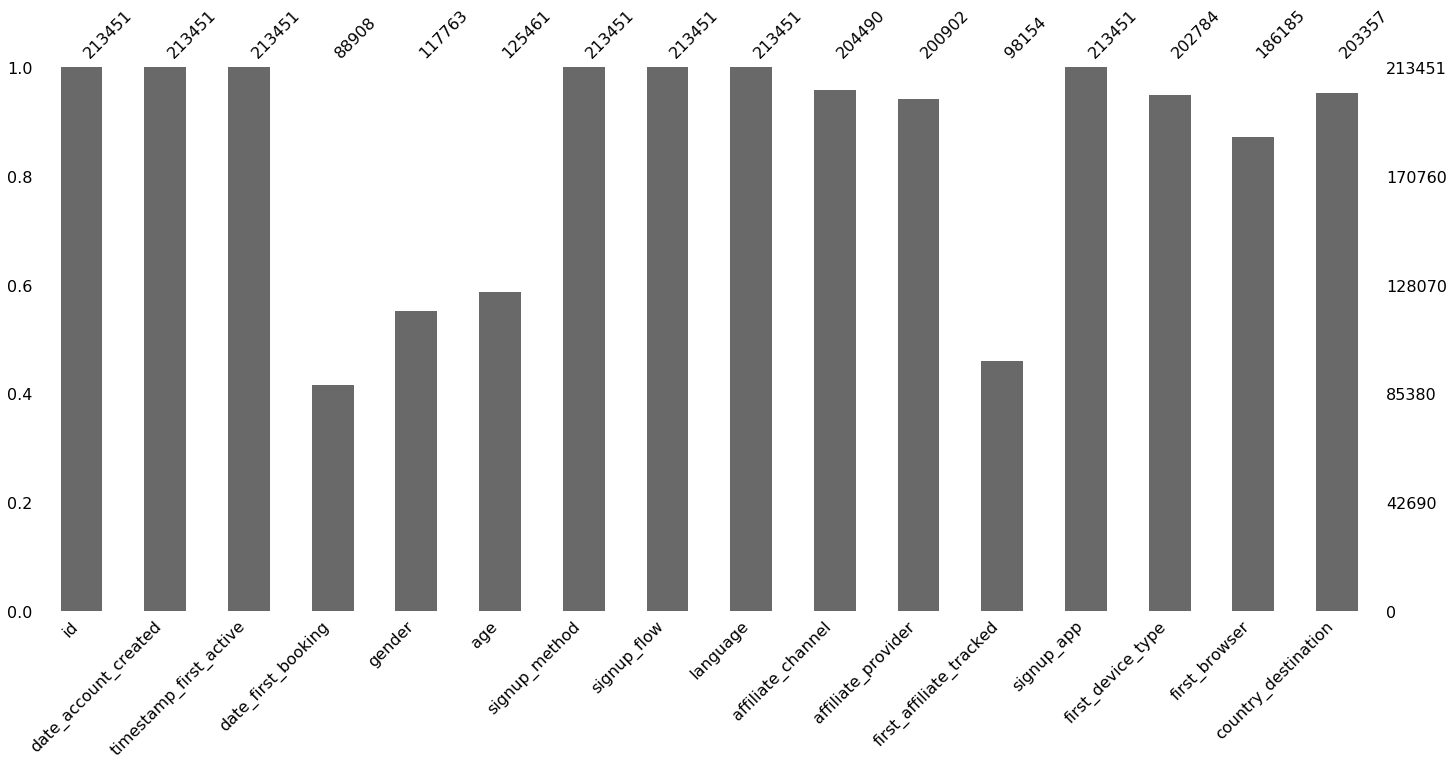

In [22]:
msno.bar(df_tr)

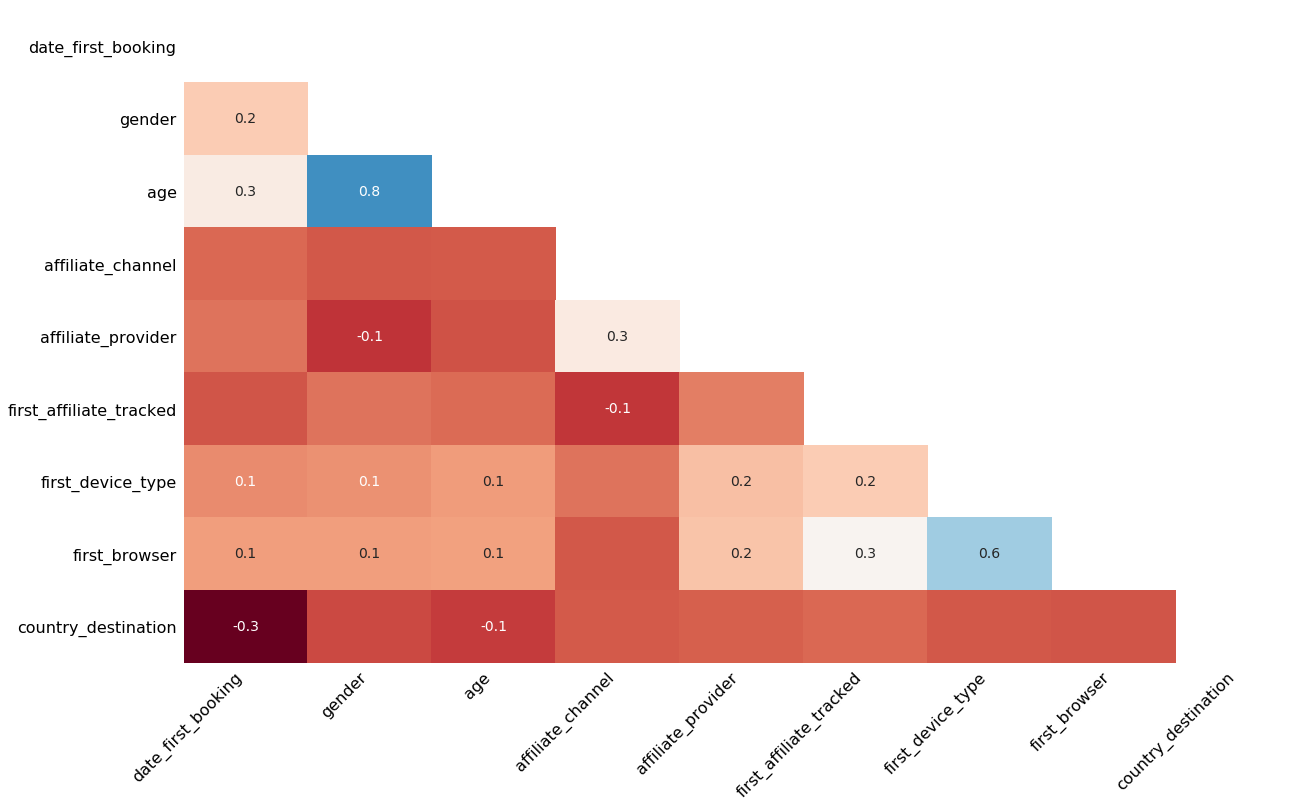

In [23]:
msno.heatmap(df_tr)

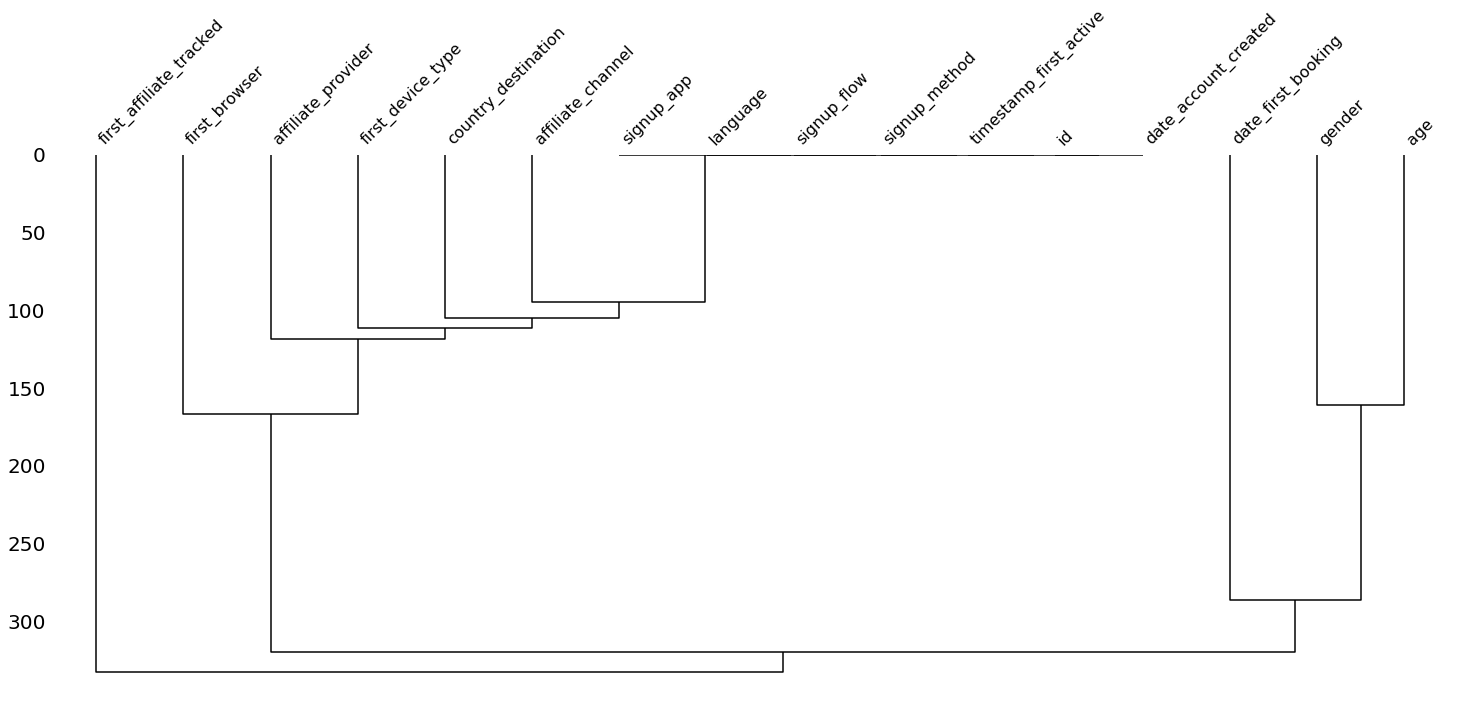

In [24]:
msno.dendrogram(df_tr)

In [ ]:
# more efficient way to replace values
df_tr2 = df.replace({'-unknown-':np.NaN, 'Other/Unknown':np.NaN, 'other':np.NaN})
df_tr2['gender'] = df_tr2.gender.replace({'MALE':0, 'FEMALE':1, 'OTHER':2})
df_tr2.head(50)